## Part A - Data Preparation

1. Load both datasets and document:
- number of rows/columns
- missing values/duplicates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sentiment_data = pd.read_csv("fear_greed_index.csv")
hist_data = pd.read_csv("historical_data.csv")

In [3]:
print(f"In Sentiment Data, we have {sentiment_data.shape[0]} rows and {sentiment_data.shape[1]} columns.")
print(f"In Historical Data, we have {hist_data.shape[0]} rows and {hist_data.shape[1]} columns.")

In Sentiment Data, we have 2644 rows and 4 columns.
In Historical Data, we have 211224 rows and 16 columns.


In [4]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


So, we can say that there are no missing values in sentiment dataset.

In [5]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

So, we can say that there are no missing values in historical dataset.

In [6]:
sentiment_data.duplicated().sum()

np.int64(0)

In [7]:
hist_data.duplicated().sum()

np.int64(0)

So, there are no duplicates in both the datasets.

--------------------------

2. Convert timestamps and align the datasets by date.

In [8]:
hist_data['Timestamp IST'] = pd.to_datetime(hist_data['Timestamp IST'], dayfirst=True)
hist_data['date'] = hist_data['Timestamp IST'].dt.normalize()


In [9]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data['date'] = sentiment_data['date'].dt.normalize()

In [15]:
hist_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12,2024-12-02
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12,2024-12-02
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12,2024-12-02
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12,2024-12-02
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12,2024-12-02


## Creating Metrics

In [53]:
daily_pnl = hist_data.groupby(['Account', 'date'])['Closed PnL'].sum().reset_index()


In [55]:
daily_avg_pnl = daily_pnl.groupby('Account')['Closed PnL'].mean().reset_index()
daily_avg_pnl.rename(columns = {'Closed PnL': 'Average Daily PnL'}, inplace=True)
daily_avg_pnl.head(10)

,Account,Average Daily PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,66676.242499
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,920.871548
2,0x271b280974205ca63b716753467d5a371de622ab,-5869.682610
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,817.684040
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,2444.318913
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-725.665116
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,314.280855
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,1910.580259
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,9975.279637
9,0x430f09841d65beb3f27765503d0f850b8bce7713,14876.495441


In [57]:
max_loss_day = daily_pnl.groupby('Account')['Closed PnL'].min().reset_index()
max_loss_day.rename(columns = {'Closed PnL': 'Max Loss Day'}, inplace=True)
max_loss_day.head(10)

,Account,Max Loss Day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,-175611.000056
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-12346.990829
2,0x271b280974205ca63b716753467d5a371de622ab,-108176.918700
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-19833.530157
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,-3323.090682
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-58444.949486
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,-77308.420095
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,0.000000
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.000000
9,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000


In [108]:
daily_pnl = daily_pnl.sort_values(['Account', 'date'])
daily_pnl['cum_pnl'] = daily_pnl.groupby('Account')['Closed PnL'].cumsum()
daily_pnl['running_peak'] = daily_pnl.groupby('Account')['cum_pnl'].cummax()

daily_pnl['drawdown'] = daily_pnl['running_peak'] - daily_pnl['cum_pnl']
max_drawdown = daily_pnl.groupby('Account')['drawdown'].max().reset_index()
max_drawdown.rename(columns = {'drawdown': 'Max Drawdown'}, inplace=True)
max_drawdown.head()

,Account,Max Drawdown
0,0x083384f897ee0f19899168e3b1bec365f52a9012,327505.900056
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,22505.512854
2,0x271b280974205ca63b716753467d5a371de622ab,127214.259261
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,20765.484966
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3323.090682


In [60]:
hist_data['abs_size'] = hist_data['Size USD'].abs()

avg_trade_size = hist_data.groupby(['Account', 'date'])['abs_size'].mean().reset_index()
avg_trade_size.rename(columns = {'abs_size' : 'Avg Trade Size'}, inplace=True)
avg_trade_size.head()

,Account,date,Avg Trade Size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,5089.718249
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,7976.664412
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,23734.500000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,28186.666667
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,17248.148148


In [52]:

closed_trades_data = hist_data[hist_data['Closed PnL'] != 0]
closed_trades_data.shape
hist_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [61]:
closed_trades_data['is_win'] = (closed_trades_data['Closed PnL'] > 0).astype(int)

daily_winrate = closed_trades_data.groupby(['Account', 'date'])['is_win'].mean().reset_index()
daily_winrate.rename(columns = {'is_win': 'Win Rate'}, inplace=True)
daily_winrate.head(2)

,Account,date,Win Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1.0


In [62]:
daily_trades = hist_data.groupby(['Account', 'date']).size().reset_index(name = 'Executions')
daily_trades.head()

,Account,date,Executions
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [65]:
hist_with_avg_trade_size = pd.merge(hist_data, avg_trade_size, on=['Account', 'date'], how='left')
hist_with_avg_trade_size.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,abs_size,Avg Trade Size
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,1779.029545
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,1779.029545


In [80]:
hist_with_avg_trade_size['leverage_dist'] = hist_with_avg_trade_size['abs_size']/hist_with_avg_trade_size['Avg Trade Size']

daily_leverage_dist = hist_with_avg_trade_size.groupby(['Account', 'date'])['leverage_dist'].max().reset_index()
daily_leverage_dist.rename(columns= {'leverage_dist': 'Max Leverage'}, inplace=True)
daily_leverage_dist.head(2)

,Account,date,Max Leverage
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,11.788464
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,8.259353


In [84]:
direction_counts = hist_data.groupby(['Account', 'date', 'Side']).size().reset_index(name='Count')

direction_pivot = direction_counts.pivot_table(index=['Account', 'date'],
                                               columns='Side', values='Count', fill_value=0).reset_index()
direction_pivot['long_short_ratio'] = direction_pivot['BUY'] / (direction_pivot['SELL']+1)
direction_pivot.head(2)

Side,Account,date,BUY,SELL,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177.0,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68.0,0.0


**Merging all metrics into a table**

In [85]:
daily_behaviour = pd.merge(daily_pnl, daily_trades, on=['Account', 'date'], how='inner')
daily_behaviour = pd.merge(daily_behaviour, daily_winrate, on=['Account', 'date'], how='left')
daily_behaviour = pd.merge(daily_behaviour, daily_leverage_dist, on=['Account', 'date'], how='left')
daily_behaviour = pd.merge(daily_behaviour, direction_pivot, on=['Account', 'date'], how='left')
daily_behaviour.head(2)

,Account,date,Closed PnL,Executions,Win Rate,Max Leverage,BUY,SELL,long_short_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,NaN,11.788464,0.0,177.0,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,NaN,8.259353,0.0,68.0,0.0


### Trader Segmentation Analysis

To understand whether all traders behave similarly, we categorize traders based on their average leverage usage, frequency of trading and average win rate. 
This helps identify whether poor performance is caused by market conditions or trader risk behaviour.


In [111]:
trader_profile = daily_behaviour.groupby('Account').agg({'Win Rate':'mean', 'Max Leverage': 'mean', 'Executions': 'mean', 'Closed PnL': 'mean'}).reset_index()
median_lev = trader_profile['Max Leverage'].median()
trader_profile['Trader Type'] = trader_profile['Max Leverage'].apply(lambda x: 'High Risk Trader' if x> median_lev else 'Low Risk Trader')

trader_profile.groupby('Trader Type')[['Win Rate', 'Executions', 'Closed PnL']].mean()

,Win Rate,Executions,Closed PnL
Trader Type,,,
High Risk Trader,0.809045,188.659835,11019.942975
Low Risk Trader,0.869543,36.496720,3269.105899


In [112]:
median_trades = trader_profile['Executions'].median()
trader_profile['Trader Type'] = trader_profile['Executions'].apply(lambda x: 'Frequent Trader' if x > median_trades else 'Infrequent Trader')

trader_profile.groupby('Trader Type')[['Win Rate', 'Closed PnL']].mean()

,Win Rate,Closed PnL
Trader Type,,
Frequent Trader,0.837475,10713.058123
Infrequent Trader,0.841113,3575.990751


In [113]:
median_winrate = trader_profile['Win Rate'].median()
trader_profile['Trader Type'] = trader_profile['Win Rate'].apply(lambda x: 'Consistent Winner' if x > median_winrate else 'Inconsistent Winner')

trader_profile.groupby('Trader Type')[['Executions', 'Closed PnL', 'Max Leverage']].mean()

,Executions,Closed PnL,Max Leverage
Trader Type,,,
Consistent Winner,127.435102,7212.127715,11.626330
Inconsistent Winner,97.721452,7076.921159,9.777466


## Creating Final dataset by merging behaviour dataset with Sentiment dataset.

In [86]:
final_dataset = pd.merge(daily_behaviour, sentiment_data, on='date', how='left')
final_dataset.head(2)

,Account,date,Closed PnL,Executions,Win Rate,Max Leverage,BUY,SELL,long_short_ratio,timestamp,value,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,NaN,11.788464,0.0,177.0,0.0,1.731303e+09,76.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,NaN,8.259353,0.0,68.0,0.0,1.731821e+09,90.0,Extreme Greed


## Data Analysis and Visualization

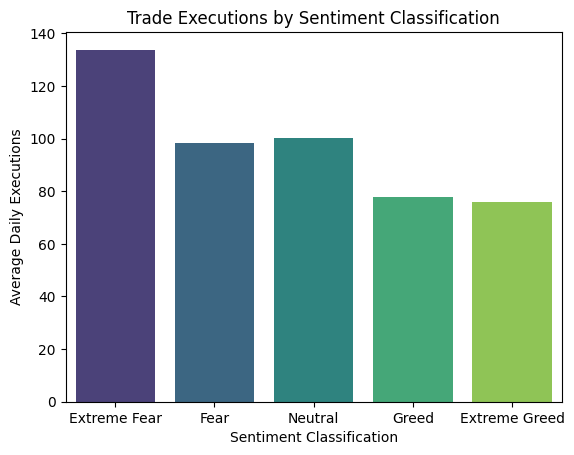

In [93]:
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
trade_vs_sentiment = final_dataset.groupby('classification')['Executions'].mean().reindex(sentiment_order).reset_index()
sns.barplot(x= 'classification', y= 'Executions', data = trade_vs_sentiment, palette='viridis')
plt.title('Trade Executions by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Daily Executions')
plt.show()

**Trading activity significantly increases during fear periods and declines during greed periods, indicating panic-driven overtrading behaviour rather than opportunity-driven trading.**

In [97]:
winrate_vs_sentiment = final_dataset.groupby('classification')['Win Rate'].mean().reindex(sentiment_order).reset_index()
winrate_vs_sentiment.head()

,classification,Win Rate
0,Extreme Fear,0.771535
1,Fear,0.862488
2,Neutral,0.835721
3,Greed,0.846074
4,Extreme Greed,0.867883


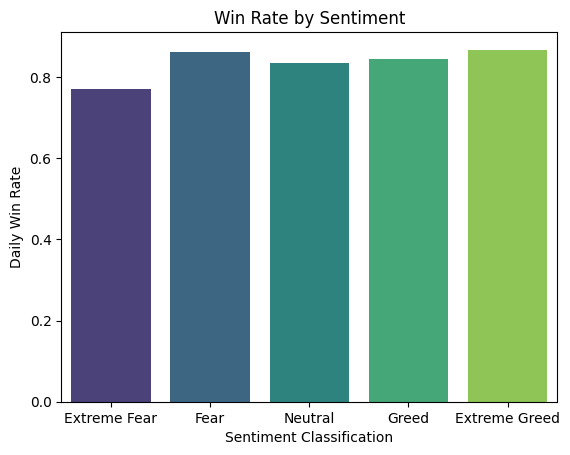

In [98]:
sns.barplot(x='classification', y='Win Rate', data=winrate_vs_sentiment, palette='viridis')
plt.title('Win Rate by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Daily Win Rate')
plt.show()

**Increased trading activity during fear periods is associated with reduced trading efficiency, suggesting panic-driven decisions degrade performance.**

In [99]:
max_leverage_vs_sentiment = final_dataset.groupby('classification')['Max Leverage'].mean().reindex(sentiment_order).reset_index()
max_leverage_vs_sentiment.head()

,classification,Max Leverage
0,Extreme Fear,14.214242
1,Fear,9.805803
2,Neutral,9.112908
3,Greed,7.018264
4,Extreme Greed,7.380935


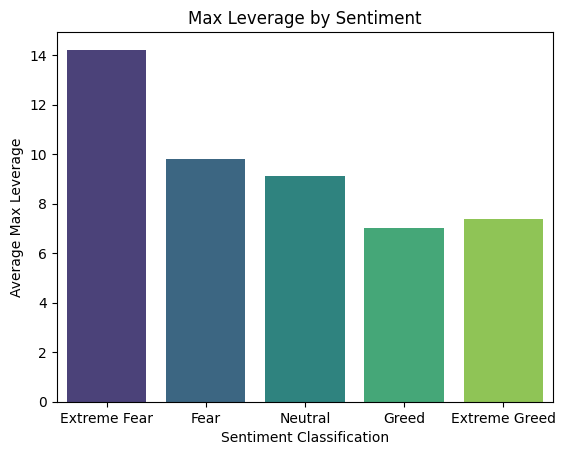

In [100]:
sns.barplot(x='classification', y='Max Leverage', data=max_leverage_vs_sentiment, palette='viridis')
plt.title('Max Leverage by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Max Leverage')
plt.show()

**Traders significantly increase leverage during extreme fear periods, suggesting revenge trading behaviour rather than opportunistic risk-taking during greed.**

In [88]:
final_dataset.groupby('classification')['long_short_ratio'].mean()

classification
Extreme Fear     12.261575
Extreme Greed     5.430688
Fear              6.807456
Greed             5.437438
Neutral           5.991553
Name: long_short_ratio, dtype: float64

**Traders tend to BUY more during extreme fear periods and SELL more during greed periods.**

In [101]:
pnl_vs_sentiment = final_dataset.groupby('classification')['Closed PnL'].mean().reindex(sentiment_order).reset_index()
pnl_vs_sentiment.head()

,classification,Closed PnL
0,Extreme Fear,4619.439053
1,Fear,5328.818161
2,Neutral,3438.618818
3,Greed,3318.100730
4,Extreme Greed,5161.922644


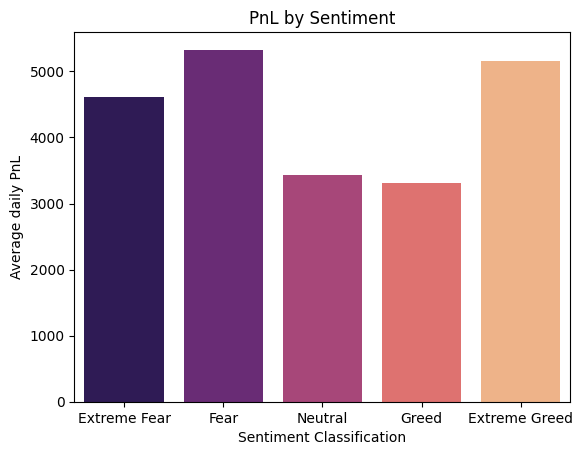

In [103]:
sns.barplot(x='classification', y='Closed PnL', data=pnl_vs_sentiment, palette='magma')
plt.title('PnL by Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average daily PnL')
plt.show()

**Traders earn lower profits during Neutral and Greed phases, but profits increase again in Extreme Greed and Fear conditions.
This suggests traders perform better when market shows strong direction, and struggle when market sentiment is uncertain.**

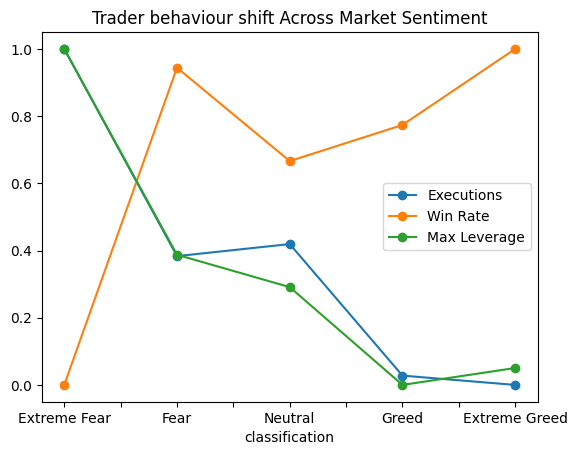

In [107]:
metrics = final_dataset.groupby('classification')[['Executions', 'Win Rate', 'Max Leverage']].mean().reindex(sentiment_order)
normalized_metrics = (metrics - metrics.min()) / (metrics.max() - metrics.min())
normalized_metrics.plot(marker='o')
plt.title('Trader behaviour shift Across Market Sentiment')
plt.show()

**Traders take maximum risk and trade most aggressively during Extreme Fear, but achieve the highest win rates during Extreme Greed, indicating emotionally driven trading decisions rather than rational ones.**